# 训练线性模型

## 随机线性数据求解正规方程

In [29]:
import numpy as np

X = 2 * np.random.rand(100, 1) # 生成100个随机数
y= 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3*x + 满足高斯分布的一个噪声, 使得数据集不是完全线性的|

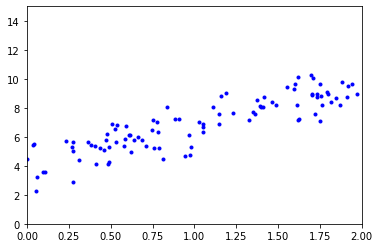

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.axis([0,2,0,15]) 
plt.show()

In [31]:
# 求解正规方程

X_b = np.c_[np.ones((100, 1)), X] # X里存放的是n个X1, 还需要加上始终为1的X0
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06856551],
       [2.76109747]])

In [32]:
# 使用求解出来的值进行预测
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06856551],
       [9.59076046]])

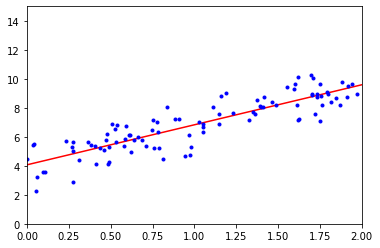

In [33]:
plt.plot(X_new,y_predict,"r")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15]) 
plt.show()

## 多项式回归

In [34]:
# 简单二次方程生成非线性数据

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

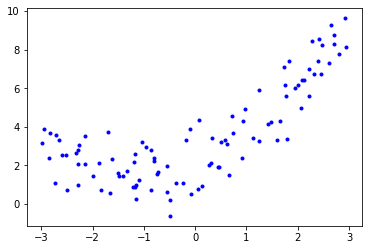

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.show()

In [36]:
# 将特征的平方作为新特征对数据集进行转换

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-2.26689078,  5.1387938 ])

In [37]:
# 在新的数据集上进行线性回归

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10066925]), array([[1.02697888, 0.47352622]]))

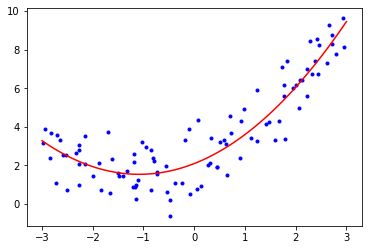

In [38]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # 在-3到3之间生成固定间隔的100个数
X_new_poly = poly_features.fit_transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-')
plt.show()

## 学习曲线

In [39]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 

def plot_learning_curves(model, X, y):     
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) # 分出20%的验证集
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # 前m个当做训练集
        y_train_predict = model.predict(X_train[:m]) # 
        y_val_predict = model.predict(X_val)         
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))         
        val_errors.append(mean_squared_error(y_val_predict, y_val))     
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")     
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

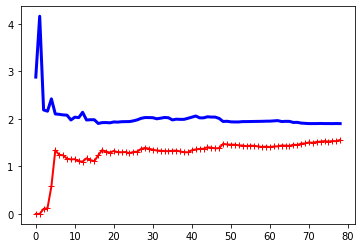

In [40]:
# 线性回归的学习曲线
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)


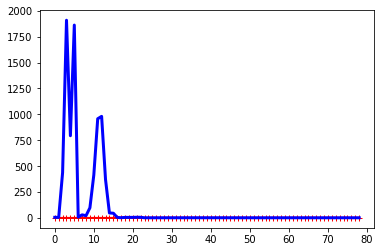

In [41]:
# 10阶多项式模型的学习曲线

from sklearn.pipeline import Pipeline

poly_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))
    
plot_learning_curves(poly_regression, X, y)

## 决策边界

In [42]:
# 加载iris数据集

from sklearn import datasets

iris = datasets.load_iris()

print(iris.keys())
print(iris["DESCR"])

# 只根据petal width预测
X = iris["data"][:, 3:] # petal width是第四个属性, 只取[:, 3]的话shape是(m,)既向量, 取3:的话shape是(m, 1)矩阵形式
y = (iris["target"] == 2).astype(np.int)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

In [43]:
# 训练回归模型

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
# LogisticRegression默认multi_class参数为ovr, 表示可以用来预测二分问题
# 返回的预测概率为 [反例的概率, 正例的概率]

log_reg.fit(X, y) # 这里没有分出测试集

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

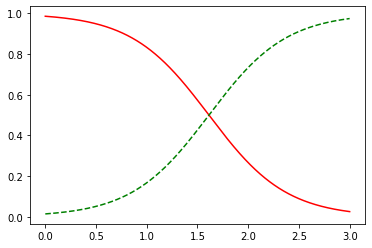

In [44]:
# 查看模型输出的概率曲线
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 通过上面的数据集描述看到petal width的最大最小值在0到3之间
# reshape(-1, 1), 其中1表示第二维长度为1, -1表示第一维的长度通过数据的长度自动计算

y_proba = log_reg.predict_proba(X_new) # 预测概率值

plt.plot(X_new, y_proba[:, 0], 'r-')
plt.plot(X_new, y_proba[:, 1], 'g--')
plt.show()

## Softmax回归

In [45]:
X = iris["data"][:, (2, 3)] # 取petal lenth和width为特征值
y = iris["target"] # 多分类(单输出)

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


## 习题